## Importing packeges

In [2]:
from ising_lib import *
from numpy import *
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
%matplotlib inline

def variance(X):
    return var(X)

def Average(X):
    return average(X)
    
    
    
def analyze(temparature,L,E,M):
    mag,mag_err=jacknife(M,Average)
    sp_heat,sp_heat_err=jacknife(E,variance)
    sp_heat/=(temparature*temparature*L)
    sp_heat_err/=(temparature*temparature*L)
    sucep,sucep_err=jacknife(M,variance)
    sucep/=(temparature*L)
    sucep_err/=(temparature*L)
    return [mag,mag_err],[sp_heat,sp_heat_err],[sucep,sucep_err]

In [3]:
from imp import reload
import ising_lib
ising_lib=reload(ising_lib)

## VERIFICATION FOR ALGOS

READING DATA

In [16]:
f=open('cppData/fnames20','r')
fnames=[]
l=f.readline()
while l:
    fnames.append(l[:-1])
    l=f.readline()
f.close()

In [17]:
l=len(fnames)
print(l)

50


In [18]:
ml=5000
sampled=[]
analy=dict()
i=0
f=open('cppanalysis/result','w')
f_xi=open('cppanalysis/cfit','w')
f.write("Temp,N,Magetization,MagErr,Specific_Heat,SP_Err,Succeptibility,succepErr")
f.write("\n")
f_xi.write("N,temp,Xi,Xi_err")
f_xi.write("\n")
i=0
l=len(fnames)
for fn in fnames:
    i+=1
    print("Doing ",i,"/",l,fn)
    dat=get_data('cppData/'+fn);
    L=dat['params']['length of lattice  '];
    T=dat['params']['T   '];
    N=dat['params']['Number of sites  '];
    sdata=sample_data(dat,Max_lags=ml);
    sampled.append(sdata)
    ana=analyze(T,N,sdata['energy'],sdata['magentization'])
    analy.update({(L,T):{'mag':ana[0][0]/N,'mag_err':ana[0][1]/N,
                     'sp_heat':ana[1][0],'sp_heat_err':ana[1][1],
                     'sucep':ana[2][0],
                     'sucep_err':ana[2][1]}})
    f_xi.write(str(L)+",")
    f_xi.write(str(T)+",")
    f_xi.write(str(ana[2][0])+",")
    f_xi.write(str(ana[2][1]))
    f_xi.write("\n")
    f.write(str(T)+","+str(N))
    f.write(","+str(ana[0][0])+","+str(ana[0][1]))
    f.write(","+str(ana[1][0])+","+str(ana[1][1]))
    f.write(","+str(ana[2][0])+","+str(ana[2][1]))  
    f.write("\n")
f.close()
f_xi.close()

Doing  1 / 50 N_20_T_1.800_ising.txt
Doing  2 / 50 N_20_T_1.820_ising.txt
Doing  3 / 50 N_20_T_1.840_ising.txt
Doing  4 / 50 N_20_T_1.860_ising.txt
Doing  5 / 50 N_20_T_1.880_ising.txt
Doing  6 / 50 N_20_T_1.900_ising.txt
Doing  7 / 50 N_20_T_1.920_ising.txt
Doing  8 / 50 N_20_T_1.940_ising.txt
Doing  9 / 50 N_20_T_1.960_ising.txt
Doing  10 / 50 N_20_T_1.980_ising.txt
Doing  11 / 50 N_20_T_2.000_ising.txt
Doing  12 / 50 N_20_T_2.020_ising.txt
Doing  13 / 50 N_20_T_2.040_ising.txt
Doing  14 / 50 N_20_T_2.060_ising.txt
Doing  15 / 50 N_20_T_2.080_ising.txt
Doing  16 / 50 N_20_T_2.100_ising.txt
Doing  17 / 50 N_20_T_2.120_ising.txt
Doing  18 / 50 N_20_T_2.140_ising.txt
Doing  19 / 50 N_20_T_2.160_ising.txt
Doing  20 / 50 N_20_T_2.180_ising.txt
Doing  21 / 50 N_20_T_2.200_ising.txt
Doing  22 / 50 N_20_T_2.220_ising.txt
Doing  23 / 50 N_20_T_2.240_ising.txt
Doing  24 / 50 N_20_T_2.260_ising.txt
Doing  25 / 50 N_20_T_2.280_ising.txt
Doing  26 / 50 N_20_T_2.300_ising.txt
Doing  27 / 50 N_20_T

Sampling for Indipentant states

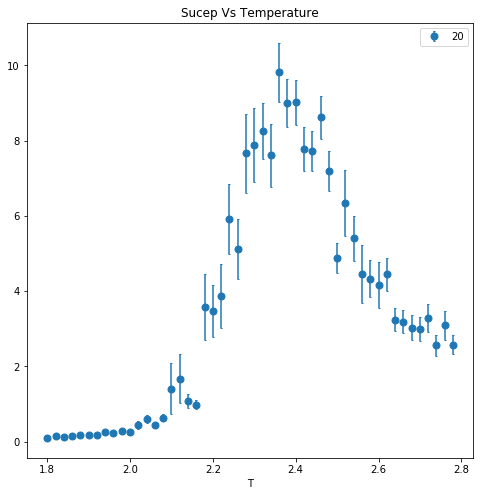

In [12]:
X=dict()
Y=dict()
Y_err=dict()
lable='sucep'
for i in analy.keys():
    if i[0] not in X.keys():
        X.update({i[0]:[]})
        Y.update({i[0]:[]})
        Y_err.update({i[0]:[]})
    X[i[0]].append(i[1])
    Y[i[0]].append(analy[i][lable])
    Y_err[i[0]].append(analy[i][lable+'_err'])
    
plt.figure(figsize=(8,8))
for i in X.keys():
    plt.errorbar(X[i],Y[i],Y_err[i],fmt='o',label=str(i),markersize=7,barsabove=True,capsize=1)
plt.legend(loc=0)
plt.title('Sucep Vs Temperature')
plt.xlabel('M')
plt.xlabel('T')
# plt.savefig('pics/Mag_VS_T_cpp_scatter.png')

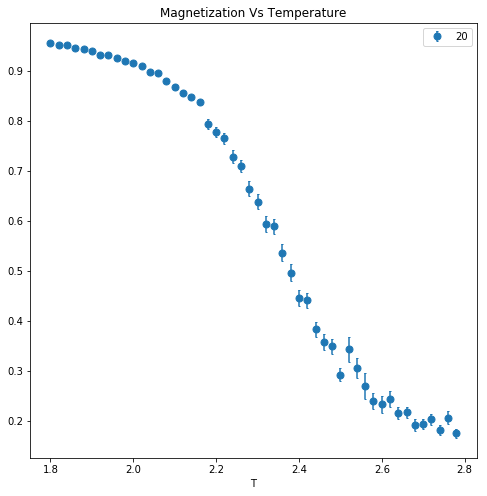

In [13]:
X=dict()
Y=dict()
Y_err=dict()
lable='mag'
for i in analy.keys():
    if i[0] not in X.keys():
        X.update({i[0]:[]})
        Y.update({i[0]:[]})
        Y_err.update({i[0]:[]})
    X[i[0]].append(i[1])
    Y[i[0]].append(analy[i][lable])
    Y_err[i[0]].append(analy[i][lable+'_err'])
    
plt.figure(figsize=(8,8))
for i in X.keys():
    plt.errorbar(X[i],Y[i],Y_err[i],fmt='o',label=str(i),markersize=7,barsabove=True,capsize=1)
plt.legend(loc=0)
plt.title('Magnetization Vs Temperature')
plt.xlabel('M')
plt.xlabel('T')
# plt.savefig('pics/Mag_VS_T_cpp_scatter.png')

## Finite Size Scaling Methord

## Curve fitting 

In [14]:
f=open('cppanalysis/cfit','r')
# f=open('DATA/critical_exps/cfit','r')
l=f.readline()
l=f.readline()
xi=[]
xi_err=[]
xiL=[]
xitemp=[]
while l:
    it=l[:-1].split(",")
    xiL.append(float(it[0]))
    xitemp.append(float(it[1]))
    xi.append(float(it[2]))
    xi_err.append(float(it[3]))
    l=f.readline()
reduced_temp=[(i-2.26)/2.26 for i in xitemp]

Xi_dic=dict()
for i,j,k,l in zip(xi,xi_err,xiL,reduced_temp):
    if k not in Xi_dic.keys():
        Xi_dic.update({k:{'temp':[],'sucep':[],'sucep_err':[]}})
    Xi_dic[k]['temp'].append(l)
    Xi_dic[k]['sucep'].append(i)    
    Xi_dic[k]['sucep_err'].append(j)   

    Leniarising the whole data set 

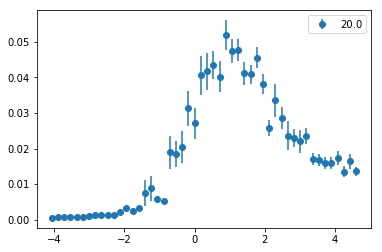

In [15]:
for k in Xi_dic.keys():
    x2=[i/k**1.75 for i in Xi_dic[k]['sucep']]
    x2_err=[i/k**1.75 for i in Xi_dic[k]['sucep_err']]
    x_ax=[k*i for i in Xi_dic[k]['temp']]
    plt.errorbar(x_ax,x2,x2_err,fmt='o',label=str(k))
plt.legend(loc=1)

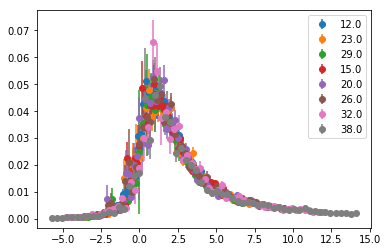

In [5]:
for k in Xi_dic.keys():
    x2=[i/k**1.75 for i in Xi_dic[k]['sucep']]
    x2_err=[i/k**1.75 for i in Xi_dic[k]['sucep_err']]
    x_ax=[k*i for i in Xi_dic[k]['temp']]
    plt.errorbar(x_ax,x2,x2_err,fmt='o',label=str(k))
plt.legend(loc=0)

In [43]:
dimen=dict()
for k in Xi_dic.keys():
    dimen.update({k:[k for i in Xi_dic[k]['temp']]})
ls=[]
temps=[]
xis=[]
xis_err=[]
for k in Xi_dic.keys():
    if k==38:
        continue
    for l,m,i,j in zip(Xi_dic[k]['sucep'],Xi_dic[k]['sucep_err'],Xi_dic[k]['temp'],dimen[k]):
#         if i<0.0:
#             continue
        ls.append(j)
        temps.append(i)
        xis.append(l)
        xis_err.append(m)

    Ploting the whole dset

<Container object of 3 artists>

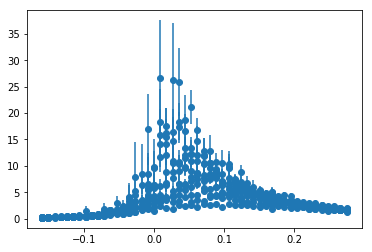

In [44]:
plt.errorbar(temps,xis,xis_err,fmt='o')

<Container object of 3 artists>

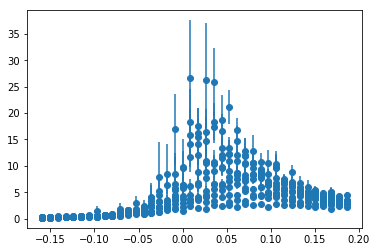

In [27]:
plt.errorbar(temps,xis,xis_err,fmt='o')

        FITTING FROM WHOLE DATA

In [45]:
def sucepFunc(var,gamma,neu,tc,a,b,c):
#     tc=2.26
    t=(var[1]-tc)/tc
    x=t*(var[0]**(1/neu))
    return (var[0])**(gamma/neu)*(a+b*x+c*x*x)

def sucepFunc(var,gamma,neu,a,b,c):
    tc=2.26
    t=(var[1]-tc)/tc
    x=t*(var[0]**(1/neu))
    return (var[0])**(gamma/neu)*(a+b*x+c*x*x)

def sucepFuncA(var,gamma,neu,tc,a,b,c):
#     tc=2.26
    t=(var[1]-tc)/tc
    x=t*(var[0]**(1/neu))
    return (var[0])**(gamma/neu)*(a+b*x+c*x*x)

def sucepFuncB(var,gamma,neu,a,b,c):
    tc=2.26
    t=(var[1]-tc)/tc
    x=t*(var[0]**(1/neu))
    return (var[0])**(gamma/neu)*(a*(1-1/(1+exp(-b*x*x)))+c)

def sucepFuncC(var,gamma,neu,tc,a,b,c):
#     tc=2.26
    t=(var[1]-tc)/tc
    x=t*(var[0]**(1/neu))
    return (var[0])**(gamma/neu)*(a*(1-1/(1+exp(-b*x*x)))+c)

def sucepFuncD(var,gamma,neu,tc,a,b,c):
#     tc=2.26
    t=(var[1]-tc)/tc
    x=t*(var[0]**(1/neu))
    return (var[0])**(gamma/neu)*(a/(1+exp(b*x*x)))

In [48]:
temps2=[i*2.26+2.26 for i in temps]
cf=curve_fit(sucepFunc,[ls,temps2],xis)
print("gamma = ",cf[0][0]," +/- ",sqrt(cf[1][0][0]))
print("neu = ",cf[0][1]," +/- ",sqrt(cf[1][1][1]))
print("tc = ",cf[0][2]," +/- ",sqrt(cf[1][2][2]))
for i in cf[0]:
    print("{0:0.3f}".format(i),end=",")
# print(matrix(cf[1]))

gamma =  6.552868812657937  +/-  2.0940786149685136
neu =  5.279079546344496  +/-  1.7670903589295366
tc =  0.12722426839635023  +/-  0.03608344626394622
6.553,5.279,0.127,0.290,-1.116,

In [23]:
temps2=[i*2.26+2.26 for i in temps]
cf=curve_fit(sucepFuncC,[ls,temps2],xis)
print("gamma = ",cf[0][0]," +/- ",sqrt(cf[1][0][0]))
print("neu = ",cf[0][1]," +/- ",sqrt(cf[1][1][1]))
print("tc = ",cf[0][2]," +/- ",sqrt(cf[1][2][2]))
for i in cf[0]:
    print("{0:0.3f}".format(i),end=",")
# print(matrix(cf[1]))

gamma =  -113.43224314541833  +/-  2116.718980063855
neu =  -93.32660503766438  +/-  1745.0156698334333
tc =  2.0120664841571343  +/-  0.009449614612074149
-113.432,-93.327,2.012,-0.336,191.827,0.158,

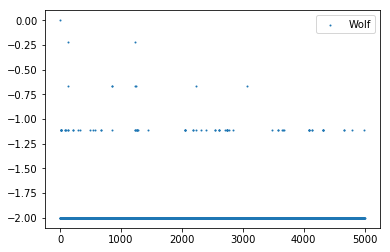

In [7]:
k=int(0.5e4)
# plt.scatter(dat3['time'][0:k],[i/N**2 +2 for i in dat3['energy'][0:k]],label='py',s=1)
# plt.scatter(dat2['time'][0:k],[i/N**2 for i in dat2['energy'][0:k]],label='Metro',s=1)
plt.scatter(dat1['time'][0:k],[i/N**2 for i in dat1['energy'][0:k]],label='Wolf',s=1)
plt.legend(loc=0)

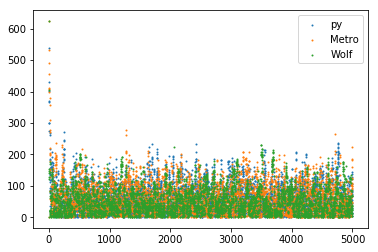

In [159]:
k=int(0.5e4)
plt.scatter(dat3['time'][0:k],dat3['magentization'][0:k],s=1,label='py')
plt.scatter(dat2['time'][0:k],dat2['magentization'][0:k],s=1,label='Metro')
plt.scatter(dat1['time'][0:k],dat1['magentization'][0:k],s=1,label='Wolf')
plt.legend(loc=0)

In [167]:
ml=1000
sdata=sample_data(dat1,Max_lags=ml);
a=analyze(3.2,25*25,sdata['energy'],sdata['magentization'])
print("wolf")
print(a)
sdata=sample_data(dat2,Max_lags=ml);
a=analyze(3.2,25*25,sdata['energy'],sdata['magentization'])
print("metro")
print(a)
sdata=sample_data(dat3,Max_lags=ml);
a=analyze(3.2,25*25,sdata['energy'],sdata['magentization'])
print("pycode")
print(a)

wolf
([34.375, 6.138313195731288], [0.41089843749999994, 0.16609362675221614], [0.2649296875, 0.078464502922318])
metro
([55.55, 6.933131350418544], [0.5008359374999999, 0.09412668455194373], [0.91389875, 0.22792460751973698])
pycode
([67.9, 9.016297611364635], [0.21752499999999994, 0.04582938564936674], [1.545595, 0.4969820767189925])


## Defining functions

In [165]:
def variance(X):
    return var(X)

def Average(X):
    return average(X)
    
    
    
def analyze(temparature,L,E,M):
    mag,mag_err=jacknife(M,Average)
    sp_heat,sp_heat_err=jacknife(E,variance)
    sp_heat/=(temparature*temparature*L)
    sp_heat_err/=(temparature*temparature*L)
    sucep,sucep_err=jacknife(M,variance)
    sucep/=(temparature*L)
    sucep_err/=(temparature*L)
    return [mag,mag_err],[sp_heat,sp_heat_err],[sucep,sucep_err]

## Sampling the thermalized zone

In [169]:
from imp import reload
import ising_lib
ising_lib=reload(ising_lib)
from ising_lib import *

In [170]:
NUMS=[12,18,23,29,15,20,26,32,38]
x=1.92
T=[]
for i in range(60):
    T.append(x)
    x+=0.02
lag=1e4
erroneus=[]
for N in NUMS:
    for temp in T:
        try:
            t_s="{0:.2f}".format(temp)
            fname='DATA/MC_2Dising_model_data_serc/N_'+str(N)+'_T_'+str(t_s)+"_icingMC"        
            data=get_data(fname)
            resampled_data,tau,err=sample_data(data,int(lag),return_params=True)
            if(tau>400):
                erroneus.append([N,temp])
            print("N = ",N," T = ",t_s," tau = ",tau," err = ",err)
            resampled_data['params'].update({'remarks':'resampled with themalization params as below '})
            resampled_data['params'].update({'lags_read':int(lag)})
            resampled_data['params'].update({'Sampled_at':max(int(tau*2),25)})
            resampled_data['params'].update({'correlation_time':int(tau)})
            resampled_data['params'].update({'correlation_time_err':float(err)})
            fname='DATA/critical_exps/sampled_data/N_'+str(N)+'_T_'+str(t_s)+"_icingMC" 
            write_data(fname,resampled_data)
        except:
            erroneus.append([N,temp])
print("________  ERRONEUS  _____\n",erroneus)

N =  12  T =  1.92  tau =  4  err =  0.06830830615711093
N =  12  T =  1.94  tau =  13  err =  0.19198851053579633
N =  12  T =  1.96  tau =  23  err =  0.30133956702928966
N =  12  T =  1.98  tau =  9  err =  0.15822771445658462
N =  12  T =  2.00  tau =  8  err =  0.14422426034616964
N =  12  T =  2.02  tau =  6  err =  0.09284242400400405
N =  12  T =  2.04  tau =  7  err =  0.11155182153680339
N =  12  T =  2.06  tau =  11  err =  0.1870980706767788
N =  12  T =  2.08  tau =  9  err =  0.17315482799986642
N =  12  T =  2.10  tau =  11  err =  0.16726867894601016
N =  12  T =  2.12  tau =  14  err =  0.21819474176943035
N =  12  T =  2.14  tau =  15  err =  0.246850443532347
N =  12  T =  2.16  tau =  31  err =  0.5129810078596215
N =  12  T =  2.18  tau =  28  err =  0.5633519518115175
N =  12  T =  2.20  tau =  12  err =  0.22078835008788106
N =  12  T =  2.22  tau =  16  err =  0.27394160510953497
N =  12  T =  2.24  tau =  17  err =  0.31807986671497473
N =  12  T =  2.26  tau =

## Data Analysis for the models

### Getting the data read

## Data extraction for the curve fitting ( and saving the analysis too)

In [25]:
NUMS=[12,23,29,15,20,26,32,38]
x=1.92
T=[]
for i in range(60):
    T.append(x)
    x+=0.02

f=open("DATA/critical_exps/results",'w')
f_xi=open("DATA/critical_exps/cfit",'w')
f.write("Temp")
errer_happend=[]
for N in NUMS:
    f.write(",N_"+str(N)+"_mag"+",N_"+str(N)+"_magErr"+",N_"+str(N)+"_sp_heat"+",N_"+str(N))
    f.write("_sp_heatErr"+",N_"+str(N)+"_succep"+",N_"+str(N)+"_succepErr")
f.write("\n")
f_xi.write("N,temp,Xi,Xi_err")

for temp in T:
    t_s="{0:.2f}".format(temp)
    f.write(t_s)
    for N in NUMS:
        try:
            loga=open('log','a')
            loga.write("AT "+str(N)+" , "+t_s+" -> \n")
            loga.close()
            fname='DATA/critical_exps/sampled_data/N_'+str(N)+'_T_'+str(t_s)+"_icingMC"
            data_h=get_data(fname)
            print("N = ",N," T = ",t_s,"got Data",end="->analyzing..")
            ana=analyze(temp,N**2,data_h['energy'],data_h['magentization'])
            print("Done!! -> writing to file ->",end="")
            f_xi.write("\n"+str(N)+",")
            f_xi.write(str(temp)+",")
            f_xi.write(str(ana[2][0])+",")
            f_xi.write(str(ana[2][1]))
            f.write(","+str(ana[0][0])+","+str(ana[0][1]))
            f.write(","+str(ana[1][0])+","+str(ana[1][1]))
            f.write(","+str(ana[2][0])+","+str(ana[2][1]))  
            print(" DONE !")
            loga=open('log','a')
            loga.write("DONE !! \n")
            loga.close()
        except:
            print ("!! at (N,T) -> (",N,",",temp,") ,")
            errer_happend.append([N,temp])
    f.write("\n")
f.close()
f_xi.close()

N =  12  T =  1.92 got Data->analyzing..Done!! -> writing to file -> DONE !
N =  23  T =  1.92 got Data->analyzing..Done!! -> writing to file -> DONE !
N =  29  T =  1.92 got Data->analyzing..Done!! -> writing to file -> DONE !
N =  15  T =  1.92 got Data->analyzing..Done!! -> writing to file -> DONE !
N =  20  T =  1.92 got Data->analyzing..Done!! -> writing to file -> DONE !
N =  26  T =  1.92 got Data->analyzing..Done!! -> writing to file -> DONE !
N =  32  T =  1.92 got Data->analyzing..Done!! -> writing to file -> DONE !
N =  38  T =  1.92 got Data->analyzing..Done!! -> writing to file -> DONE !
N =  12  T =  1.94 got Data->analyzing..Done!! -> writing to file -> DONE !
N =  23  T =  1.94 got Data->analyzing..Done!! -> writing to file -> DONE !
N =  29  T =  1.94 got Data->analyzing..Done!! -> writing to file -> DONE !
N =  15  T =  1.94 got Data->analyzing..Done!! -> writing to file -> DONE !
N =  20  T =  1.94 got Data->analyzing..Done!! -> writing to file -> DONE !
N =  26  T =

In [30]:
Xi_dic.keys()

dict_keys([16.0, 20.0, 24.0, 28.0, 32.0])

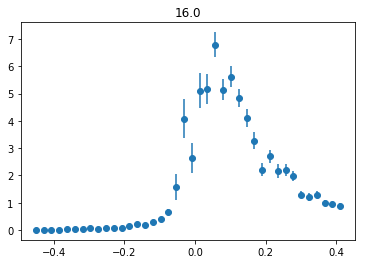

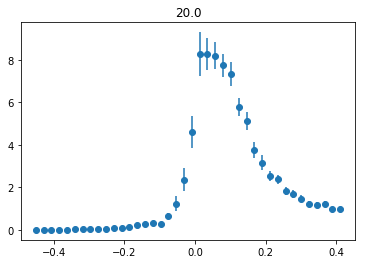

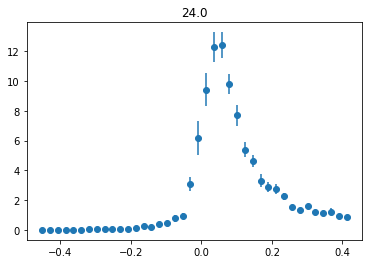

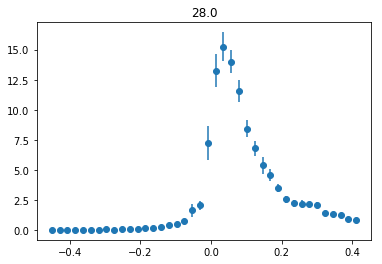

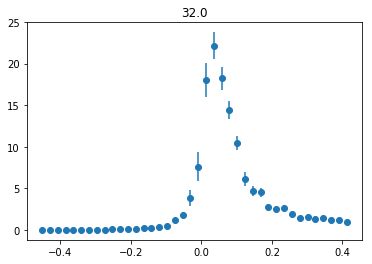

In [31]:
for k in Xi_dic.keys():
    plt.figure()
    plt.errorbar(Xi_dic[k]['temp'],Xi_dic[k]['sucep'],Xi_dic[k]['sucep_err'],fmt='o')
    plt.title(str(k))

## Fitting log( Sucep ) vs log (reduced_temp)

    FROM THE Low twmp side

from L =  16.0  - >   2.6910415312209666  +/-  0.1948091551415541
from L =  20.0  - >   2.7414535970402527  +/-  0.15915629287995778
from L =  24.0  - >   3.0190662515523163  +/-  0.14622129873601078
from L =  28.0  - >   2.7906755877416223  +/-  0.11174958224025859
from L =  32.0  - >   2.890236208984656  +/-  0.1312092497356004


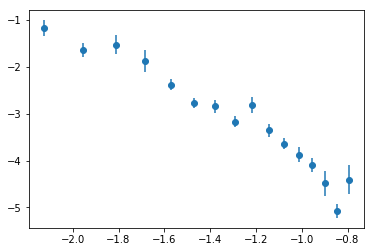

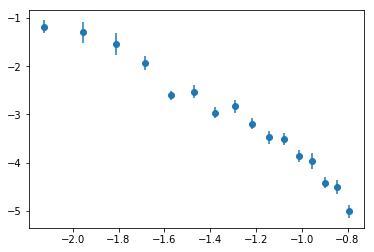

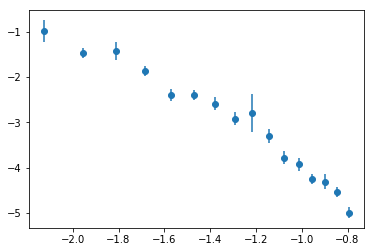

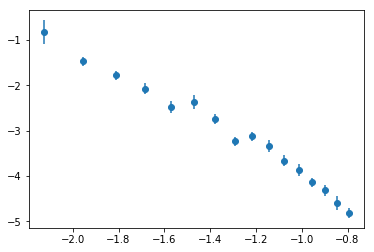

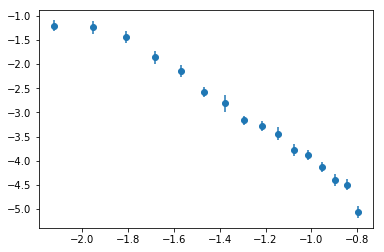

In [32]:
def _leniar(x,a,b):
    return b+a*x
for k in list(Xi_dic.keys()):
    p=0
    for i in Xi_dic[k]['temp']:
        if i>0:
            break
        p+=1
    lnXi=[log(i) for i in Xi_dic[k]['sucep'][:p]]
    lnXi_err=[i/j for i,j in zip(Xi_dic[k]['sucep_err'],Xi_dic[k]['sucep'][:p])]
    lntemp=[log(abs(i)) for i in Xi_dic[k]['temp'][:p]]
    for i in range(5)  :  
        q=lntemp.index(min(lntemp))
        lntemp.pop(q)
        lnXi.pop(q)
        lnXi_err.pop(q)
    plt.figure()
    plt.errorbar(lntemp,lnXi,lnXi_err,fmt='o')
    c=curve_fit(_leniar,lntemp,lnXi,sigma=lnXi_err)
    print("from L = ",k," - >  ",-1*c[0][0]," +/- ",sqrt(c[1][0][0]))

    FROM THE High temp side

from L =  16.0  - >   0.18051053541412826  +/-  0.3096216693736163
from L =  20.0  - >   1.6481230241581484  +/-  0.10683969725741183
from L =  24.0  - >   1.6308278884402538  +/-  0.22847492221892685
from L =  28.0  - >   1.5541885178832198  +/-  0.18993292127255934
from L =  32.0  - >   0.6868003333554975  +/-  0.20862607783706735


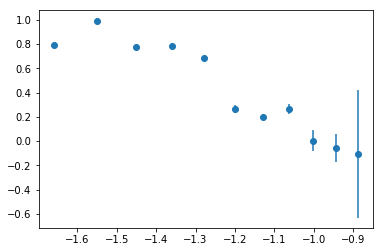

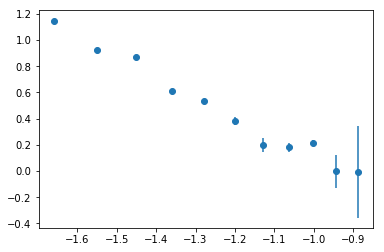

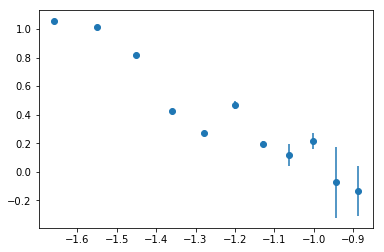

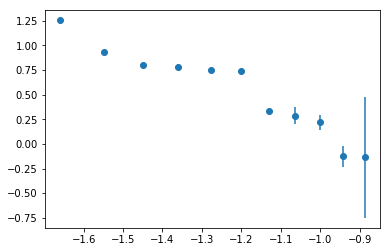

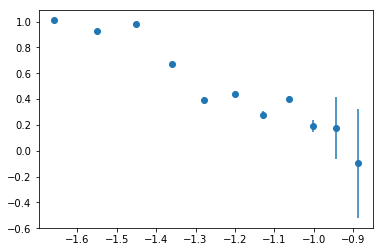

In [33]:
for k in list(Xi_dic.keys()):
    p=0
    for i in Xi_dic[k]['temp']:
        if i>0:
            break
        p+=1
    lnXi=[log(i) for i in Xi_dic[k]['sucep'][p:]]
    lnXi_err=[i/j for i,j in zip(Xi_dic[k]['sucep_err'],Xi_dic[k]['sucep'][p:])]
    lntemp=[log(abs(i)) for i in Xi_dic[k]['temp'][p:]]
    for i in range(8)  :  
        q=lntemp.index(min(lntemp))
        lntemp.pop(q)
        lnXi.pop(q)
        lnXi_err.pop(q)
    plt.figure()
    plt.errorbar(lntemp,lnXi,lnXi_err,fmt='o')
    c=curve_fit(_leniar,lntemp,lnXi,sigma=lnXi_err)
    print("from L = ",k," - >  ",-1*c[0][0]," +/- ",sqrt(c[1][0][0]))

## Fitting the peak value vs L

In [34]:
ids=[]
for k in Xi_dic.keys():
    t=max(Xi_dic[k]['sucep'])
    idt=Xi_dic[k]['sucep'].index(t)
    ids.append(idt)
#     print(max(Xi_dic[k]['sucep']))

In [35]:
Xi_dic.keys()

dict_keys([16.0, 20.0, 24.0, 28.0, 32.0])

In [36]:
NUMS=list( Xi_dic.keys())
ln_max=[log(Xi_dic[k]['sucep'][i]) for k,i in zip(NUMS,ids)]
ln_maxerr=[Xi_dic[k]['sucep_err'][i]/Xi_dic[k]['sucep'][i] for k,i in zip(NUMS,ids)]
ln_D=[log(i) for i in NUMS]

<Container object of 3 artists>

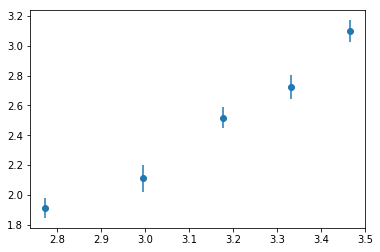

In [37]:
plt.errorbar(ln_D,ln_max,ln_maxerr,fmt='o')

In [38]:
def _leniar(x,a,b):
    return b+a*x
c=curve_fit(_leniar,ln_D,ln_max,sigma=ln_maxerr)
print("gamma = ",c[0][0]," +/- ",sqrt(c[1][0][0]))

gamma =  1.6734875532535587  +/-  0.15946224396464057


In [44]:
temps2=[i*2.26+2.26 for i in temps]
cf=curve_fit(sucepFuncC,[ls,temps2],xis)
print("gamma = ",cf[0][0]," +/- ",sqrt(cf[1][0][0]))
print("neu = ",cf[0][1]," +/- ",sqrt(cf[1][1][1]))
print("tc = ",cf[0][2]," +/- ",sqrt(cf[1][2][2]))
for i in cf[0]:
    print("{0:0.3f}".format(i),end=",")
# print(matrix(cf[1]))

gamma =  0.4820105329309635  +/-  inf
neu =  0.4930608064698312  +/-  inf
tc =  -1190.4152929780932  +/-  inf
0.482,0.493,-1190.415,-152752.813,10184.588,0.111,

/home/aravind/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp
/home/aravind/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


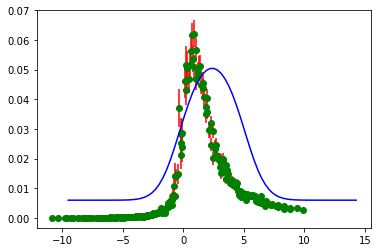

In [45]:
tc =  2.380553747775189
gamma =   1.8462567568411445
neu =   1.0889981299859464
gn=gamma/neu

for k in Xi_dic.keys():
    temps2=[i*k**(1/neu) for i in Xi_dic[k]['temp']]
    y=[i/k**gn for i in Xi_dic[k]['sucep']]
    y_err=[i/k**gn for i in Xi_dic[k]['sucep_err']]
    plt.errorbar(temps2,y,y_err,fmt='o',c='g',ecolor='r',zorder=1,label='MCMC data')
#     y=[sucepFuncA([k,i],1.447,1.006,2.373,0.096,-0.022,0.001)/k**gn for i in x]
x1=linspace(-5,5,80)
x=[i*tc+tc for i in x1]
y=[sucepFuncC([1,i],1.846,1.089,2.381,0.089,0.813,0.006) for i in x]
plt.plot(x,y,zorder=5,c='b')
# f.savefig('../VISITS/TaylorAnsatz.pdf')

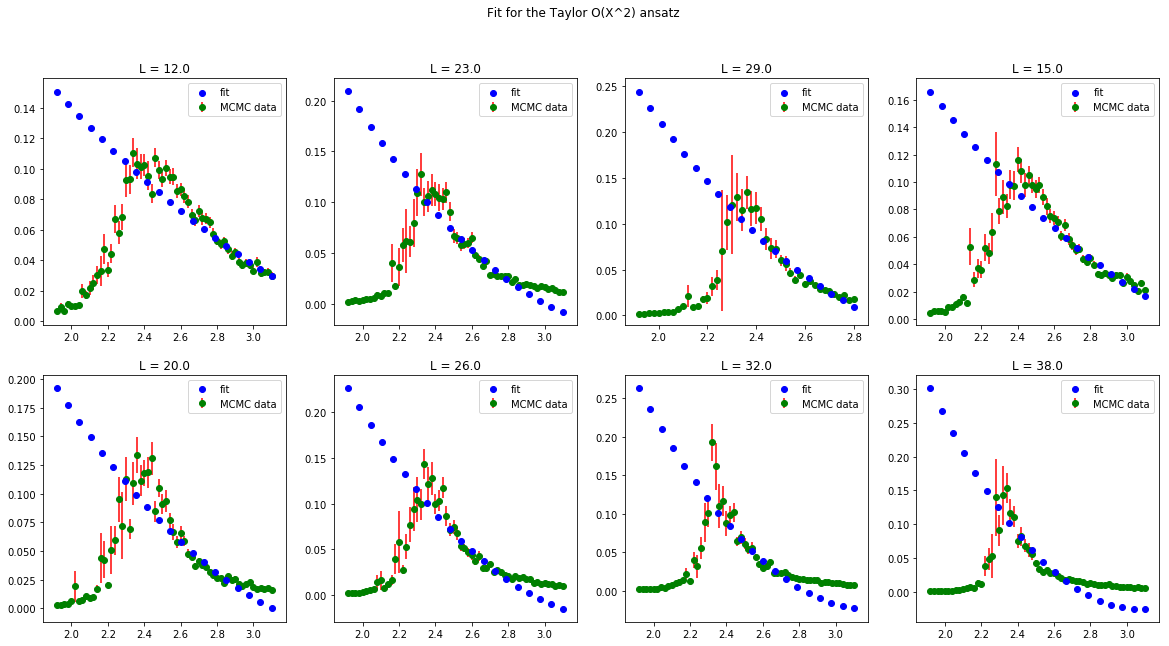

In [25]:
xmin,xmax=1e9,-1e9
tc =  2.3734450368544877
gamma =  1.4471826743188843
neu =  1.0056825050371871
gn=gamma/neu
axes=[]
f,ax=plt.subplots(nrows=2,ncols=4,figsize=(20,10))
for  i in ax:
    for j in i:
        axes.append(j)
j=0
for k in Xi_dic.keys():
    temps2=[i*2.26+2.26 for i in Xi_dic[k]['temp']]
    y=[i/k**gn for i in Xi_dic[k]['sucep']]
    x=linspace(min(temps2),max(temps2),20)
    y=[i/k**gn for i in Xi_dic[k]['sucep']]
    y_err=[i/k**gn for i in Xi_dic[k]['sucep_err']]
    axes[j].errorbar(temps2,y,y_err,fmt='o',c='g',ecolor='r',zorder=1,label='MCMC data')
    y=[sucepFuncA([k,i],1.447,1.006,2.373,0.096,-0.022,0.001)/k**gn for i in x]
    axes[j].scatter(x,y,c='b',zorder=2,label='fit')
    axes[j].legend(loc=0)
    axes[j].set_title("L = "+str(k))
    
    j+=1
f.suptitle('Fit for the Taylor O(X^2) ansatz')
# f.savefig('../VISITS/TaylorAnsatz.pdf')

        Fitting from single L

In [36]:
def sucepFunc(var,gamma,neu,a,b,c):
    x=var[1]*(var[0]**(1/neu))
    t=(var[0])**(gamma/neu) 
    t*=(a+b*x+c*x*x)
    return t

In [37]:
k=20
temps2=[i*2.26+2.26 for i in Xi_dic[k]['temp']]
cf=curve_fit(sucepFunc,[dimen[k],temps2],Xi_dic[k]['sucep'])
print("gamma = ",cf[0][0]," +/- ",sqrt(cf[1][0][0]))
for i in cf[0]:
    print("{0:0.3f}".format(i),end=",")
# print(matrix(cf[1]))

gamma =  -1.4478813502199053  +/-  99326.86158107866
-1.448,0.732,-43063.305,605.804,-2.030,

<Container object of 3 artists>

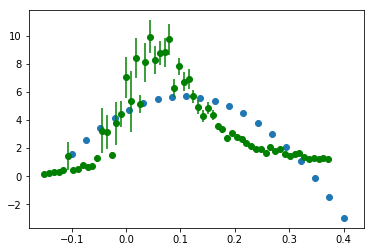

In [166]:
k=20
x=linspace(-0.1,0.4,20)
y=[sucepFunc([k,i],-62.052,68.339,70.550,300.164,-1380.121) for i in x]
plt.scatter(x,y)
plt.errorbar(Xi_dic[k]['temp'],Xi_dic[k]['sucep'],Xi_dic[k]['sucep_err'],fmt='o',c='g')

In [234]:
print("gamma = ",cf[0][0]," +/- ",sqrt(cf[1][0][0]))

gamma =  0.6172696422176321  +/-  0.7411628020869737


In [145]:
yp=[sucepFunc([i,j],1.07171635e+00,  2.17234368e+00,  1.40450682e-01, -7.57334989e-05) for i,j in zip(xiL,reduced_temp)]

In [308]:
def _fun(p,q,r):
    print(p[0],p[1])
    return r*(p[0]+p[1]**q)

x=linspace(1,10,10)
x2=[i*i for i in x]
p=[[i,j] for i,j in zip(x,x2)]
y=[i+(i*i)**0.64 for i in x]